# Unsupervised Machine Learning Final Project
## PCA on the Iris Dataset

In [26]:
# Import all required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

### Problem Description
We would like to use the PCA on the iris dataset for dimensionality reduction. This dataset contains 4 features (sepal length, sepal width, petal legth, and petal width). The goal in this project is to reduce the data to 2 principal components and visualize the data se we can show how well we can seperate the different species in reduced space

In [3]:
# Load in the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

### Cleaning Data and EDA

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

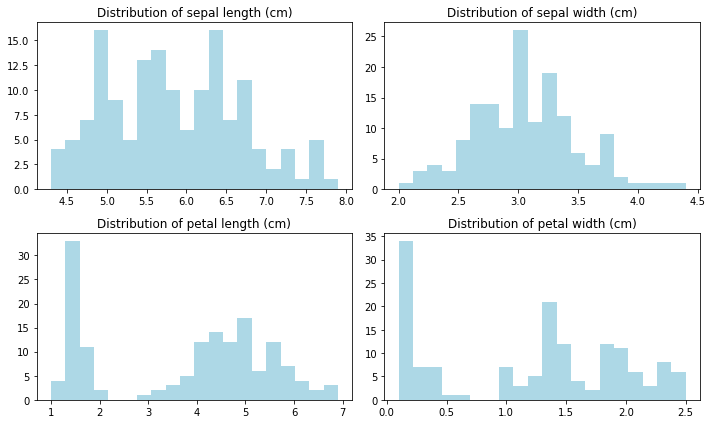

In [9]:
# visualize the distribution of the various features
plt.figure(figsize=(10,6))
for i, column in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    plt.hist(df[column], bins=20, color='lightblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()


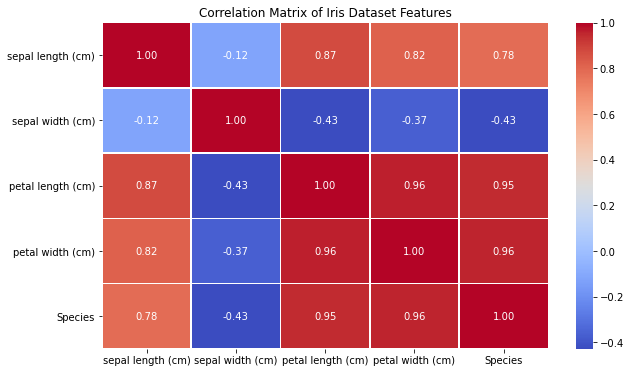

In [31]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

Our data is looking clean. We have no null values and we have visualised the data based on the feautres. Lets go ahead begin building our model.

### Model Building and Training (PCA)

In [10]:
# our first set will be to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Applying PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# PCA Dataframe
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df['Target'] = y

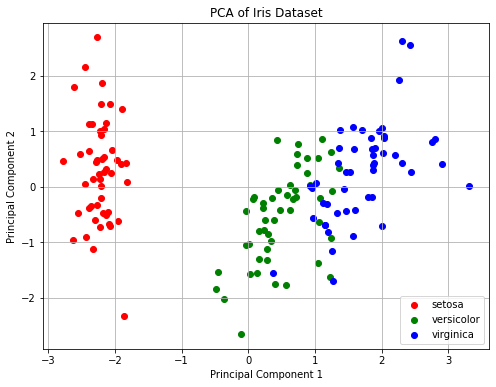

In [15]:
# Visualize PCA 
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for i, target_name in enumerate(target_names):
    plt.scatter(pca_df.loc[pca_df['Target'] == i, 'PC1'], 
                pca_df.loc[pca_df['Target'] == i, 'PC2'], 
                label=target_name, c=colors[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(target_names)
plt.grid(True)
plt.show()


In [29]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))

Explained Variance Ratio for each component: [0.72962445 0.22850762]
Cumulative Explained Variance: [0.72962445 0.95813207]


we see that nearly 96% of the variance is explained by the first 2 principal components.

### Conclusion for PCA

The PCA plot above does show that there is a clear serpation between setosa and the other two sepecies. Versicolor and Virgincia  overlap a little bit which can indicate that they may have more similiarties to eachother than they do with setosa. The first two principal components capture the most of the variance in the data which make PCA a useful technique for visualizing high dimensional data.


### Compare PCA with K means clustering

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

In [20]:
comparison_df = pd.DataFrame({'KMeans_Cluster': kmeans_labels, 'True_Label': y})

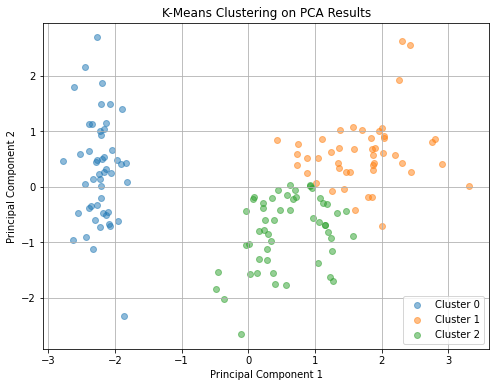

In [21]:
plt.figure(figsize=(8,6))
for i in range(3):  # We know there are 3 clusters
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], label=f'Cluster {i}', alpha=0.5)

plt.title('K-Means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
conf_matrix = confusion_matrix(y, kmeans_labels)

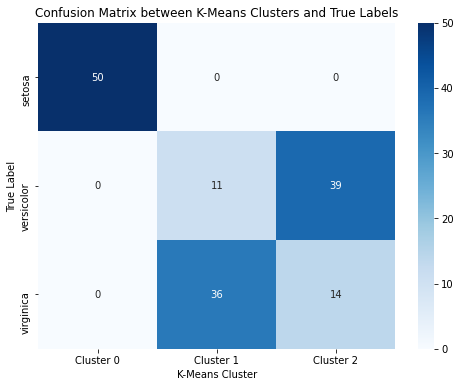

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=target_names)
plt.title('Confusion Matrix between K-Means Clusters and True Labels')
plt.xlabel('K-Means Cluster')
plt.ylabel('True Label')
plt.show()


In [28]:
accuracy = accuracy_score(y, kmeans_labels)
print(f'Accuracy of K-Means Clustering: {accuracy * 100:.2f}%')

Accuracy of K-Means Clustering: 50.00%


We have now applied 2 methods PCA and K means clustering. PCA reduced our 4 dimensions to 2 principal components which captured the majority of the variance in our data. The low accuracy score of 50% we see that K means clustering might not be the best method for this dataset.